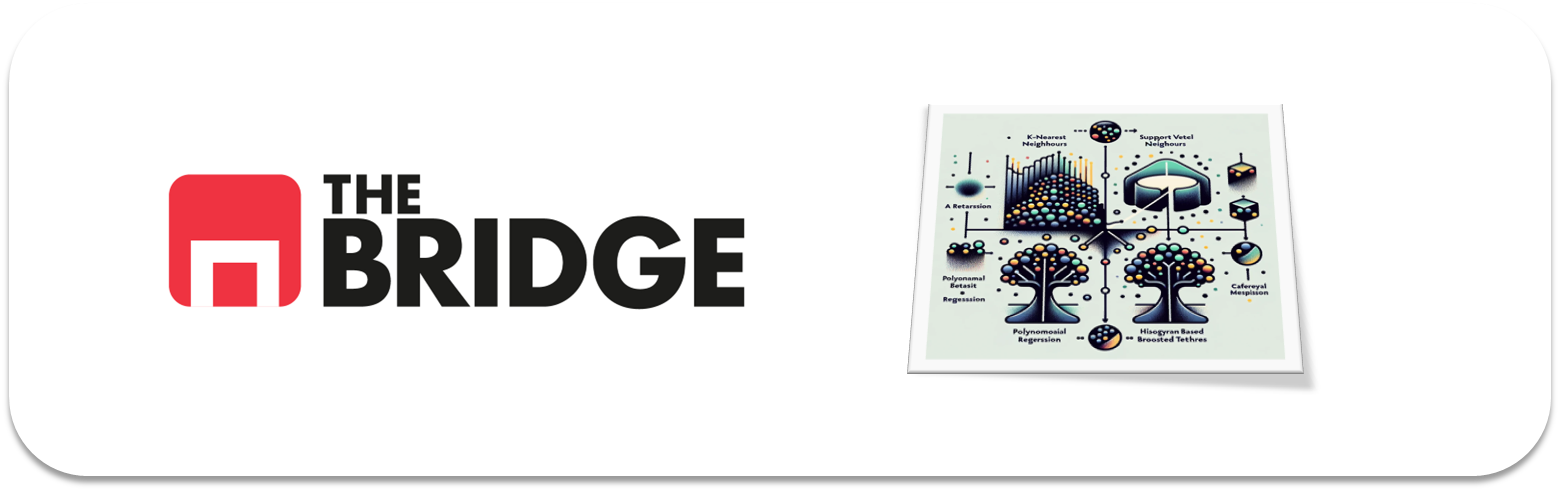

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 3)
plt.style.use('ggplot')

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler



from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df_train=pd.read_csv("./GiveMeSomeCredit-training.csv")
df_test=pd.read_csv("./GiveMeSomeCredit-testing.csv")

In [3]:
df_train.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [6]:
df_test.SeriousDlqin2yrs.value_counts(True,dropna=False)

SeriousDlqin2yrs
NaN    1.0
Name: proportion, dtype: float64

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

**Problema supervisado de clasificación binario**

In [7]:
target="SeriousDlqin2yrs"

### #1.3
Pinta la distribución de frecuencias del target y coméntala

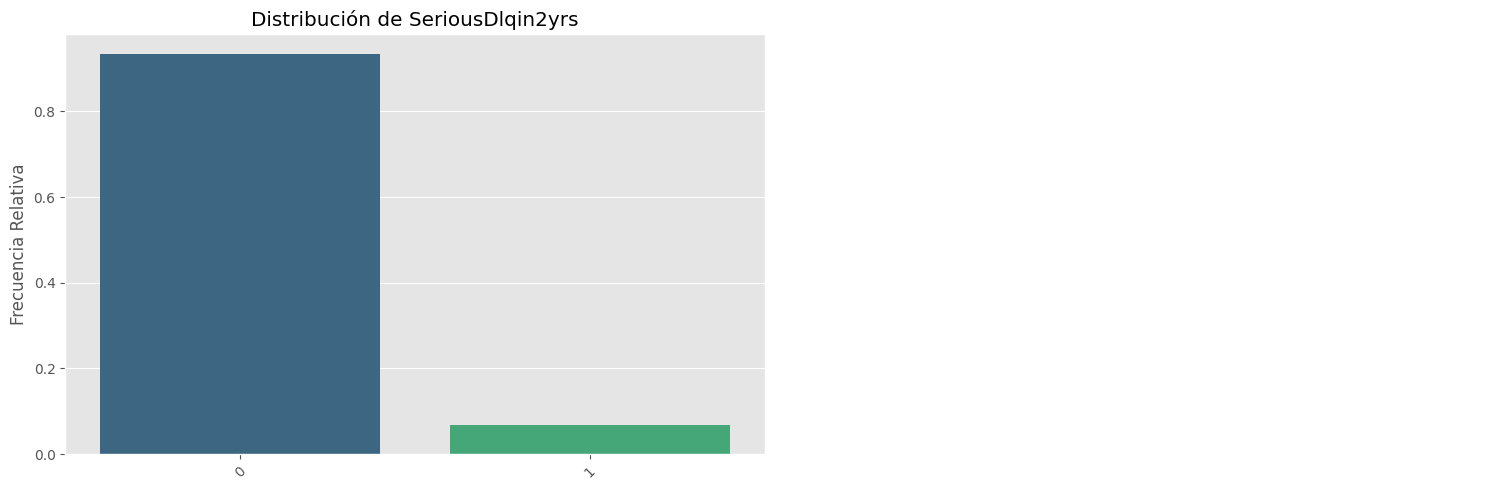

In [8]:
bt.pinta_distribucion_categoricas(df_train,["SeriousDlqin2yrs"],relativa=True)
#muy muy desbalanceada

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [9]:
#Limpieza
duplicados=df_train.duplicated()
duplicados.value_counts(True)

False    1.0
Name: proportion, dtype: float64

In [10]:
df_train.drop(columns="Unnamed: 0",inplace=True)

In [11]:
#Train/test spliting
train_set, test_set = train_test_split(df_train, test_size= 0.2, random_state= 42)

In [12]:
#Mini EDA
train_set.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,9.631100e+04,120000.000000,120000.000000,120000.000000,120000.000000,116873.000000
mean,0.067250,5.632938,52.280558,0.422292,351.040018,6.678384e+03,8.460858,0.265758,1.019942,0.239683,0.757831
std,0.250456,247.022022,14.762852,4.191649,1941.106682,1.529405e+04,5.146114,4.167864,1.132330,4.153510,1.115977
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030097,41.000000,0.000000,0.175554,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154848,52.000000,0.000000,0.367165,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558904,63.000000,0.000000,0.866549,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,326442.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,13.000000


In [13]:
bt.cardinalidad(train_set,10,10)

,Columna,Cardinalidad,% Cardinalidad,Valoración
0,SeriousDlqin2yrs,2,0.001667,Binaria
1,RevolvingUtilizationOfUnsecuredLines,101128,84.273333,Numérica Continua
2,age,85,0.070833,Numérica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,15,0.012500,Numérica Discreta
4,DebtRatio,93259,77.715833,Numérica Continua
5,MonthlyIncome,12664,10.553333,Numérica Continua
6,NumberOfOpenCreditLinesAndLoans,58,0.048333,Numérica Discreta
7,NumberOfTimes90DaysLate,18,0.015000,Numérica Discreta
8,NumberRealEstateLoansOrLines,25,0.020833,Numérica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,13,0.010833,Numérica Discreta


In [14]:
listado_num=train_set.columns.to_list()
listado_num.remove("SeriousDlqin2yrs")
listado_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [15]:
'''sns.pairplot(train_set,
            hue='SeriousDlqin2yrs',
            height=4,
            vars=listado_num); '''

"sns.pairplot(train_set,\n            hue='SeriousDlqin2yrs',\n            height=4,\n            vars=listado_num); "

In [16]:
default_0 = train_set[train_set['SeriousDlqin2yrs'] == 0]
default_1 = train_set[train_set['SeriousDlqin2yrs'] == 1]

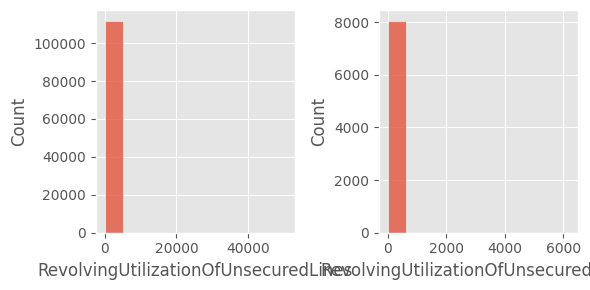

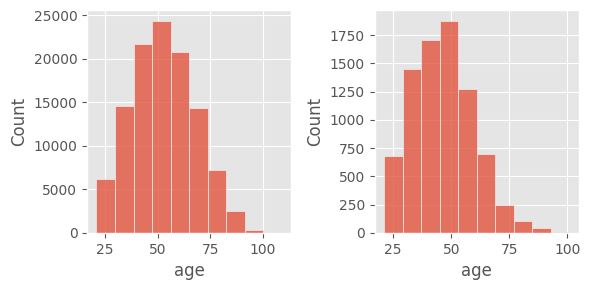

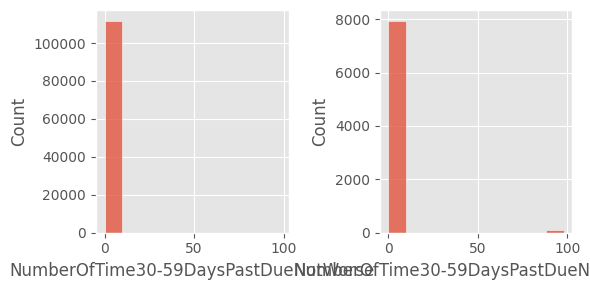

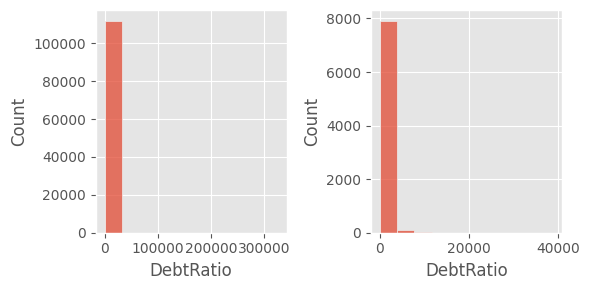

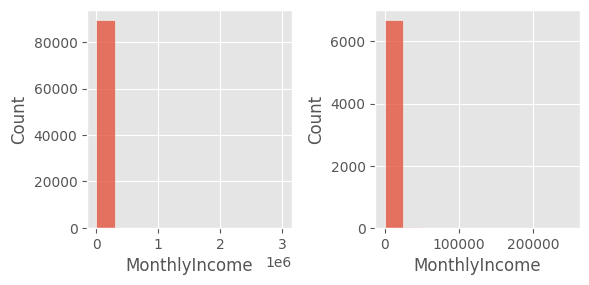

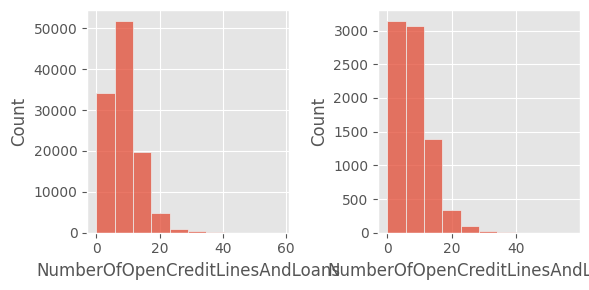

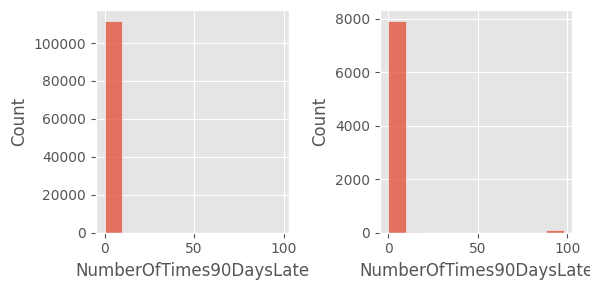

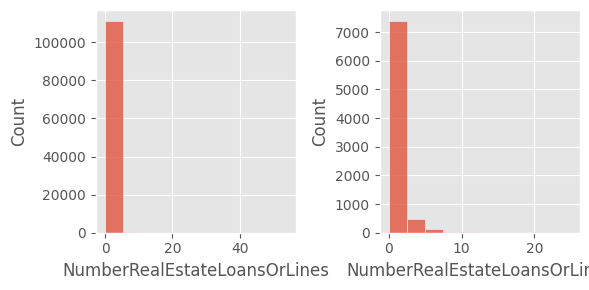

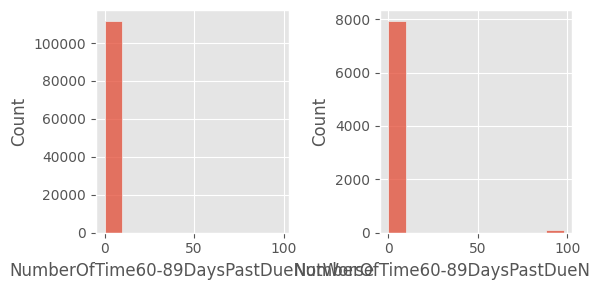

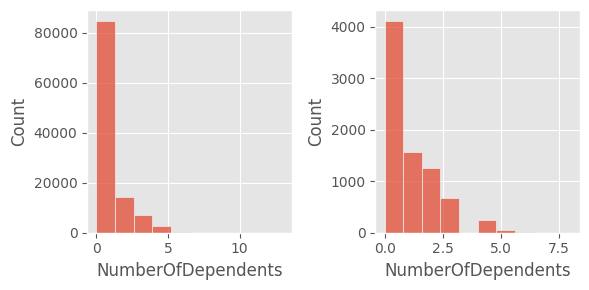

In [17]:
for column in listado_num:
    plt.figure(figsize=(6,3))
    plt.subplot(1, 2, 1)
    sns.histplot(default_0[column], bins=10)
    plt.subplot(1, 2, 2)
    sns.histplot(default_1[column], bins=10)
    plt.tight_layout()
    plt.show()

In [18]:
train_set.corr(numeric_only= True)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001534,-0.116384,0.126460,-0.008119,-0.018723,-0.029413,0.118697,-0.008519,0.102825,0.044528
RevolvingUtilizationOfUnsecuredLines,-0.001534,1.000000,-0.004535,-0.001190,0.000774,0.006886,-0.011295,-0.000903,0.005005,-0.001034,0.000360
age,-0.116384,-0.004535,1.000000,-0.062556,0.023474,0.036021,0.146868,-0.060513,0.030738,-0.056328,-0.213670
NumberOfTime30-59DaysPastDueNotWorse,0.126460,-0.001190,-0.062556,1.000000,-0.006527,-0.010250,-0.055334,0.983511,-0.030274,0.986981,-0.003841
DebtRatio,-0.008119,0.000774,0.023474,-0.006527,1.000000,-0.028270,0.052369,-0.008668,0.127897,-0.007928,-0.041805
MonthlyIncome,-0.018723,0.006886,0.036021,-0.010250,-0.028270,1.000000,0.085167,-0.012371,0.115664,-0.010764,0.059677
NumberOfOpenCreditLinesAndLoans,-0.029413,-0.011295,0.146868,-0.055334,0.052369,0.085167,1.000000,-0.080300,0.431545,-0.071022,0.066413
NumberOfTimes90DaysLate,0.118697,-0.000903,-0.060513,0.983511,-0.008668,-0.012371,-0.080300,1.000000,-0.045274,0.992790,-0.011187
NumberRealEstateLoansOrLines,-0.008519,0.005005,0.030738,-0.030274,0.127897,0.115664,0.431545,-0.045274,1.000000,-0.039439,0.126001
NumberOfTime60-89DaysPastDueNotWorse,0.102825,-0.001034,-0.056328,0.986981,-0.007928,-0.010764,-0.071022,0.992790,-0.039439,1.000000,-0.011937


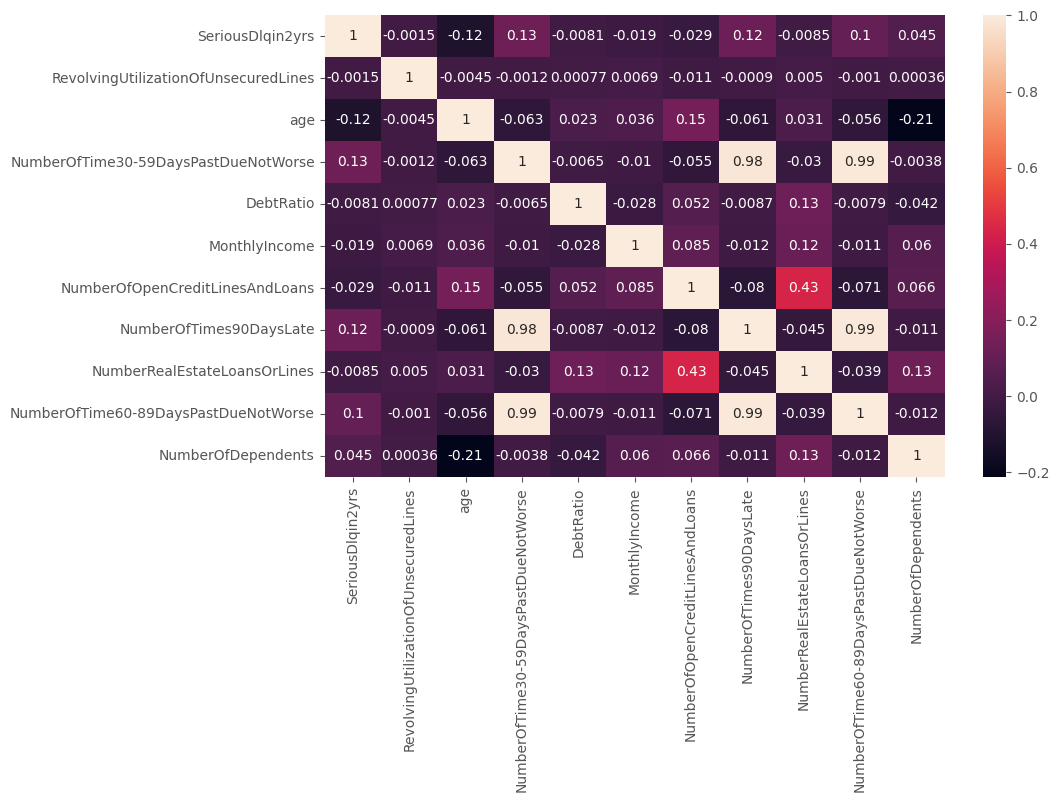

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_set.corr(numeric_only = True),annot=True)
plt.show();

In [20]:
train_set.drop(columns=["NumberOfTimes90DaysLate","NumberOfTime60-89DaysPastDueNotWorse"],inplace=True)

In [21]:
#Tratamiento de features

In [22]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 104025 to 121958
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120000 non-null  float64
 2   age                                   120000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120000 non-null  int64  
 4   DebtRatio                             120000 non-null  float64
 5   MonthlyIncome                         96311 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       120000 non-null  int64  
 7   NumberRealEstateLoansOrLines          120000 non-null  int64  
 8   NumberOfDependents                    116873 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 9.2 MB


In [23]:
train_set.loc[train_set.MonthlyIncome.isna(),'MonthlyIncome'] = train_set.MonthlyIncome.median()

In [24]:
train_set.loc[train_set.NumberOfDependents.isna(),'NumberOfDependents'] = train_set.NumberOfDependents.median()

In [25]:
train_set.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,1.200000e+05,120000.000000,120000.000000,120000.000000
mean,0.067250,5.632938,52.280558,0.422292,351.040018,6.426021e+03,8.460858,1.019942,0.738083
std,0.250456,247.022022,14.762852,4.191649,1941.106682,1.371099e+04,5.146114,1.132330,1.107938
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.030097,41.000000,0.000000,0.175554,3.901000e+03,5.000000,0.000000,0.000000
50%,0.000000,0.154848,52.000000,0.000000,0.367165,5.400000e+03,8.000000,1.000000,0.000000
75%,0.000000,0.558904,63.000000,0.000000,0.866549,7.400000e+03,11.000000,2.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,326442.000000,3.008750e+06,58.000000,54.000000,13.000000


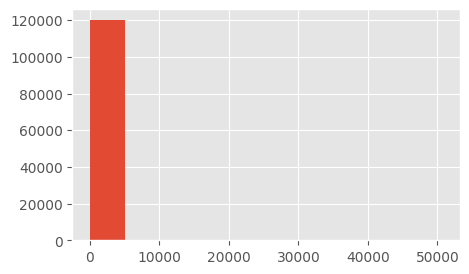

In [26]:
train_set["RevolvingUtilizationOfUnsecuredLines"].hist();

<Axes: >

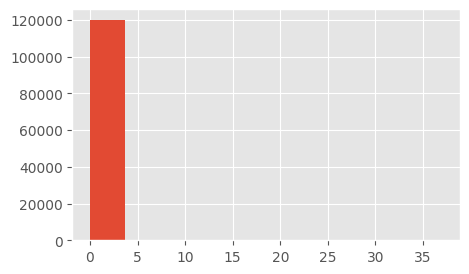

In [27]:
np.cbrt(train_set["RevolvingUtilizationOfUnsecuredLines"]).hist()

In [28]:
train_set["RevolvingUtilizationOfUnsecuredLines"] = np.sqrt(train_set["RevolvingUtilizationOfUnsecuredLines"])
test_set["NumberOfTime30-59DaysPastDueNotWorse"] = np.sqrt(test_set["NumberOfTime30-59DaysPastDueNotWorse"])
train_set["DebtRatio"] = np.sqrt(train_set["DebtRatio"])


In [29]:
train_set.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,1.200000e+05,120000.000000,120000.000000,120000.000000
mean,0.067250,0.535393,52.280558,0.422292,7.409829,6.426021e+03,8.460858,1.019942,0.738083
std,0.250456,2.312215,14.762852,4.191649,17.208629,1.371099e+04,5.146114,1.132330,1.107938
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.173486,41.000000,0.000000,0.418992,3.901000e+03,5.000000,0.000000,0.000000
50%,0.000000,0.393507,52.000000,0.000000,0.605941,5.400000e+03,8.000000,1.000000,0.000000
75%,0.000000,0.747599,63.000000,0.000000,0.930886,7.400000e+03,11.000000,2.000000,1.000000
max,1.000000,225.184369,109.000000,98.000000,571.351030,3.008750e+06,58.000000,54.000000,13.000000


In [30]:
scaler = MinMaxScaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)

In [31]:
train_set=pd.DataFrame(train_set_scaled,columns=train_set.columns)

In [32]:
#tratamiento de test
test_set.drop(columns=["NumberOfTimes90DaysLate","NumberOfTime60-89DaysPastDueNotWorse"],inplace=True)
test_set.loc[test_set.MonthlyIncome.isna(),'MonthlyIncome'] = test_set.MonthlyIncome.median()
test_set.loc[test_set.NumberOfDependents.isna(),'NumberOfDependents'] = test_set.NumberOfDependents.median()
test_set["RevolvingUtilizationOfUnsecuredLines"] = np.sqrt(test_set["RevolvingUtilizationOfUnsecuredLines"])
test_set["NumberOfTime30-59DaysPastDueNotWorse"] = np.sqrt(test_set["NumberOfTime30-59DaysPastDueNotWorse"])
test_set["DebtRatio"] = np.sqrt(test_set["DebtRatio"])

In [33]:
test_set_scaled = scaler.transform(test_set)
test_set=pd.DataFrame(test_set_scaled,columns=test_set.columns)

In [34]:
test_set.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.065200,0.002482,0.356293,0.001776,0.013173,0.002123,0.145179,0.018730,0.056518
std,0.246883,0.012079,0.168272,0.004248,0.030528,0.002951,0.088711,0.020731,0.084874
min,0.000000,0.000000,-0.238636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000757,0.227273,0.000000,0.000728,0.001299,0.086207,0.000000,0.000000
50%,0.000000,0.001726,0.352273,0.000000,0.001056,0.001795,0.137931,0.018519,0.000000
75%,0.000000,0.003323,0.477273,0.000000,0.001638,0.002431,0.189655,0.037037,0.076923
max,1.000000,0.658678,0.920455,0.032106,1.004923,0.277537,0.931034,0.537037,1.538462


In [35]:
#separación
train_set


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,0.0,0.000000,0.090909,0.000000,0.000188,0.001443,0.086207,0.000000,0.000000
1,0.0,0.003427,0.386364,0.000000,0.001600,0.000609,0.189655,0.018519,0.000000
2,0.0,0.000000,0.250000,0.000000,0.000365,0.001385,0.034483,0.000000,0.307692
3,0.0,0.002780,0.215909,0.000000,0.000428,0.002991,0.034483,0.000000,0.384615
4,0.0,0.000000,0.159091,0.000000,0.000640,0.001928,0.206897,0.018519,0.000000
...,...,...,...,...,...,...,...,...,...
119995,0.0,0.001456,0.579545,0.000000,0.001660,0.001329,0.293103,0.037037,0.076923
119996,0.0,0.001315,0.522727,0.010204,0.073863,0.001795,0.172414,0.018519,0.076923
119997,0.0,0.001165,0.318182,0.000000,0.001436,0.000931,0.137931,0.037037,0.000000
119998,0.0,0.002081,0.170455,0.000000,0.000278,0.000499,0.034483,0.000000,0.000000


In [36]:
#modelado
y_train=train_set["SeriousDlqin2yrs"]

In [37]:
X_train=train_set.drop("SeriousDlqin2yrs",axis=1)

In [38]:
y_test=test_set["SeriousDlqin2yrs"]
X_test=test_set.drop("SeriousDlqin2yrs",axis=1)

In [39]:
#RANDOM FOREST
clf = RandomForestClassifier(random_state=123, max_depth=3, n_estimators=300, class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=300,
                       random_state=123)

In [40]:
y_train_pred = clf.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83    111930
         1.0       0.17      0.79      0.28      8070

    accuracy                           0.73    120000
   macro avg       0.58      0.76      0.56    120000
weighted avg       0.92      0.73      0.80    120000



In [41]:
recall_medio = np.mean(cross_val_score(clf, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))
print(recall_medio)

KeyboardInterrupt: 

In [42]:
#XG BOOST
xg = XGBClassifier( random_state=123, n_estimators=150, learning_rate=0.05, max_depth=5)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [43]:
y_train_pred = xg.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    111930
         1.0       0.66      0.09      0.16      8070

    accuracy                           0.94    120000
   macro avg       0.80      0.54      0.56    120000
weighted avg       0.92      0.94      0.91    120000



In [44]:
recall_medio = np.mean(cross_val_score(xg, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))
print(recall_medio)

0.536964037866205


In [45]:
#KNN
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
y_train_pred = knn.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    111930
         1.0       0.72      0.14      0.23      8070

    accuracy                           0.94    120000
   macro avg       0.83      0.57      0.60    120000
weighted avg       0.93      0.94      0.92    120000



In [47]:
recall_medio = np.mean(cross_val_score(knn, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))
print(recall_medio)

0.5252596634181547


In [48]:
#balanceando RANDOMFOREST
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [49]:
# Entrenar el modelo con los datos sobremuestreados
modelo_smote = RandomForestClassifier(max_depth = 5, random_state= 42,class_weight="balanced")
modelo_smote.fit(X_train_smote, y_train_smote) 

# Realizar predicciones y evaluar el modelo
y_pred_smote = modelo_smote.predict(X_train)
print(classification_report(y_train, y_pred_smote))

              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88    111930
         1.0       0.20      0.69      0.31      8070

    accuracy                           0.79    120000
   macro avg       0.59      0.74      0.59    120000
weighted avg       0.92      0.79      0.84    120000



In [50]:
recall_medio = np.mean(cross_val_score(modelo_smote, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))
print(recall_medio)

0.7576112028328911


In [53]:
from sklearn.model_selection import RandomizedSearchCV

tree_param_grid = {
    'max_depth': [None] + list(range(1, 11)),
    'min_samples_split': [2,4,8],
    'min_samples_leaf': [2,4,8]
}

In [58]:
# RandomizedSearch para DecisionTreeClassifier
tree_grid_search = RandomizedSearchCV(clf, tree_param_grid, cv=5, scoring='average_precision')
tree_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    max_depth=3,
                                                    n_estimators=300,
                                                    random_state=123),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10],
                                        'min_samples_leaf': [2, 4, 8],
                                        'min_samples_split': [2, 4, 8]},
                   scoring='average_precision')

In [59]:
rf_best = tree_grid_search.best_estimator_

In [60]:
print(classification_report(y_test, rf_best.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.98      0.78      0.86     28044
         1.0       0.19      0.74      0.30      1956

    accuracy                           0.77     30000
   macro avg       0.58      0.76      0.58     30000
weighted avg       0.93      0.77      0.83     30000



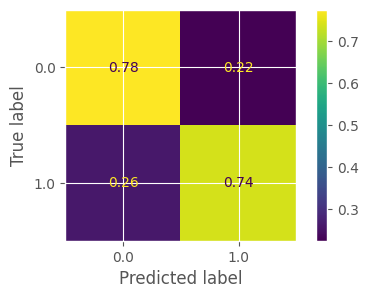

In [61]:
#INFORME DE ERRORES
ConfusionMatrixDisplay.from_predictions(y_test, rf_best.predict(X_test), normalize= "true");
